<h1>EP1 MODELAGEM</h1>

<h5>Nomes:</h5>

- Davi de Menezes Pereira, 11221988
- Gustavo de Medeiros Carlos, 11276298
- Lucas Irineu Rebouças Guimarães, 11221713
- Luciano Rodrigues Saraiva Leão, 11221817
- Luiza Barros Reis Soezima, 11221842
- Marcos Siolin Martins, 11221709



Não esquecer de utilizar a notação descrita no Enunciado embora claro q não faça o menor sentido inclusive o Gustavo não quis usar para não ficar confuso no caso do $x_0$ que ficaria ${x_0}_s$ ou ${x_s}_0$, enfim algo muito feio e ridículo logo decidi não fazer msm pq nada a ver.

<h4>Imports</h4>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import pandas as pd
import math

<h2>Movimento retilíneo uniforme e uniformemente variado</h2>

Nesses dois movimentos a aceleração é constante e chamaremos ela de $a$. No movimento retilínio uniforme temos que $a = 0$.

<h4>Solução analítica sem atrito</h4>

Resolvendo a equação diferencial,

\begin{align*}
    \ddot{x}(t) &= a \\
    \int \ddot{x}(t) dt &= \int a dt \\
    \dot{x}(t) &= at + v_0 \\
    \int \dot{x}(t) dt &= \int at + v_0 dt \\
    x(t) &= \frac{a}{2}t^2 + v_0t + x_0,
\end{align*}

obtemos a equação analítica da posição em relação ao tempo do movimento retilínio uniformemente variado.

A equação do movimento retilínio uniforme é

\begin{align*}
    x(t) &= v_0t + x_0.
\end{align*}

In [0]:
def proxXA(t, params):
    return params[0] * t * t / 2 + params[1] * t + params[2]

def proxVA(t, params):
    return params[0] * t + params[1]

<h4>Solução de Euler sem atrito</h4>

Na solução de Euler, aproximamos a integral pela série de Taylor. Sabendo que $\ddot{x}(t) = a$, vemos que

\begin{align*}
    \ddot{x}(t) &= \frac{\dot{x}(t + \Delta t) - \dot{x}(t)}{\Delta t} \\
    \ddot{x}(t)\Delta t &= \dot{x}(t + \Delta t) - \dot{x}(t) \\
    \dot{x}(t + \Delta t) &= \dot{x}(t) + \ddot{x}(t)\Delta t \\
    v(t + \Delta t) &= v(t) + a\Delta t
\end{align*}

e que

\begin{align*}
    \dot{x}(t) &= \frac{x(t + \Delta t) - x(t)}{\Delta t} \\
    \dot{x}(t)\Delta t &= x(t + \Delta t) - x(t) \\
    x(t + \Delta t) &= x(t) + \dot{x}(t)\Delta t \\
    x(t + \Delta t) &= x(t) + v(t)\Delta t.
\end{align*}

In [0]:
def proxVE(v, t, dt, params):
    return v + params[0] * dt

def proxXE(x, v, dt):
    return x + v * dt

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Na versão analítica podemos obter exatamente a velocidade e a posição quando quisermos, de maneira independente, já na versão de Euler, precisamos calcular a velocidade primeiro para depois calcular a posição em cada intervalo. Como a velocidade é uma reta por a aceleração ser constante, não cometemos erro ao aproximar pela série de Taylor de ordem 1. O mesmo não acontece em relação a posição, e o erro vai acumulando com o tempo, como é possível ver no gráfico.

<h4>Animação</h4>

O primeiro gráfico representa a posição em relação ao tempo, o segundo representa a velocidade em relação ao tempo. Em azul está o movimento pela implementação analítica e em laranja tracejado está o movimento pela implementação de Euler. Os parâmetros da utilizados de exemplo são
\begin{align*}
    a &= 2 \\
    v_0 &= 5 \\
    x_0 &= 10.
\end{align*}

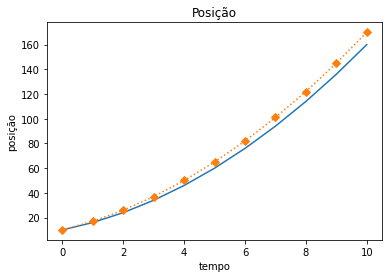

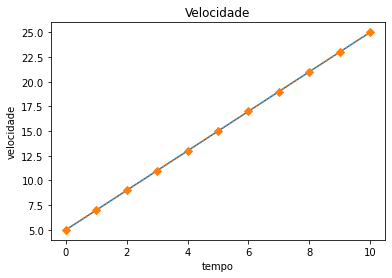

In [0]:
params = [2, 5, 10] # [a, v, x]
t = 0 # tempo atual
tf = 10 # tempo final
dt = 1 # intervalo de tempo
v = params[1] # velocidade atual
x = params[2] # posição atual

valoresXA = []
valoresVA = []
valoresXE = []
valoresVE = []

while t <= tf:
    valoresVA.append(proxVA(t, params))
    valoresXA.append(proxXA(t, params))
    valoresVE.append(v)
    valoresXE.append(x)
    v = proxVE(v, t, dt, params)
    x = proxXE(x, v, dt)
    t += dt

# grafico de posição
plt.plot(valoresXA, label='Analítico')
plt.plot(valoresXE, label='Euler', linestyle=':', marker='D')
plt.title('Posição')
plt.xlabel('tempo')
plt.ylabel('posição')
plt.show()

# grafico de velocidade
plt.plot(valoresVA, label='Analítico')
plt.plot(valoresVE, label='Euler', linestyle=':', marker='D')
plt.title('Velocidade')
plt.xlabel('tempo')
plt.ylabel('velocidade')
plt.show()

<h4>Animação</h4>

Animação de um movimento acelerado pela implementação analítica.

In [0]:
fig = plt.figure()
ax = plt.axes(xlim=(0, proxXA(tf, params)), ylim=(-1, 1))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.xlabel('posição')
plt.yticks([])
plt.close()


def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    x = proxXA(ti, params)
    y = 0
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim









---

---

<h2>Queda Livre</h2>



<h4>Solução analítica</h4>

A solução é análoga ao primeiro movimento (movimento retilineo uniformemente variado), mas em vez analisarmos o "eixo x", vamos analisar o "eixo y". Além disso, a aceleração com que o objeto cai é g. 

\begin{align*}
    \ddot{y}(t) &= -g \\
    \int \ddot{y}(t) dt &= \int -g dt \\
    \dot{y}(t) &= -gt + v_0 \\
    \int \dot{y}(t) dt &= \int -gt + v_0 dt \\
    y(t) &= -\frac{g}{2}t^2 + v_0t + y_0,
\end{align*}

obtemos a equação analítica da posição em relação ao tempo do movimento queda livre.

In [0]:
def proxYA(t, params):
    return -params[0] * t * t / 2 + params[1] * t + params[2]
 
def proxVA(t, params):
    return -params[0] * t + params[1]

Na solução por Euler, sabendo que $\ddot{y}(t) = -g$, vemos que

\begin{align*}
    \ddot{y}(t) &= \frac{\dot{y}(t + \Delta t) - \dot{y}(t)}{\Delta t} \\
    \ddot{y}(t)\Delta t &= \dot{y}(t + \Delta t) - \dot{y}(t) \\
    \dot{y}(t + \Delta t) &= \dot{y}(t) + \ddot{y}(t)\Delta t \\
    v(t + \Delta t) &= v(t) - g\Delta t
\end{align*}

e que

\begin{align*}
    \dot{y}(t) &= \frac{y(t + \Delta t) - y(t)}{\Delta t} \\
    \dot{y}(t)\Delta t &= y(t + \Delta t) - y(t) \\
    y(t + \Delta t) &= y(t) + \dot{y}(t)\Delta t \\
    y(t + \Delta t) &= y(t) + v(t)\Delta t.
\end{align*}

In [0]:
def proxVE(v, t, dt, params):
    return v - params[0] * dt

def proxYE(y, v, dt):
    return y + v * dt

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>

[200, 193, 184, 173, 160, 145]


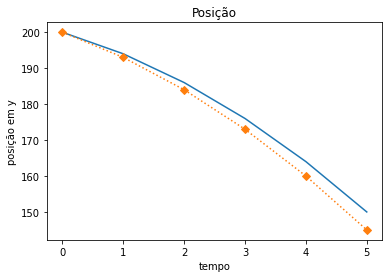

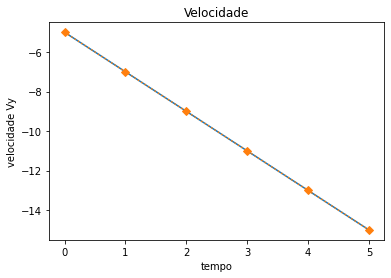

In [0]:
#

t = 0
tf = 5
params = [2, -5, 200]
v = params[1]
y = params[2]
dt = 1

valoresYA = []
valoresVA = []
valoresYE = []
valoresVE = []

while t <= tf:
    valoresVA.append(proxVA(t, params))
    valoresYA.append(proxYA(t, params))
    valoresVE.append(v)
    valoresYE.append(y)
    v = proxVE(v, t, dt, params)
    y = proxYE(y, v, dt)
    t += dt

print(valoresYE)

plt.plot(valoresYA, label='Analítico')
plt.plot(valoresYE, label='Euler', linestyle=':', marker='D')
plt.title('Posição')
plt.xlabel('tempo')
plt.ylabel('posição em y')
plt.show()

plt.plot(valoresVA, label='Analítico')
plt.plot(valoresVE, label='Euler', linestyle=':', marker='D')
plt.title('Velocidade')
plt.xlabel('tempo')
plt.ylabel('velocidade Vy')
plt.show()

fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(proxYA(tf, params), params[2]))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.ylabel('posição')
plt.xticks([])
plt.close()

def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    y = proxYA(ti, params)
    x = 0
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim



---

---

<h2>Pêndulo</h2>



<h4>Solução analítica</h4>

![]( 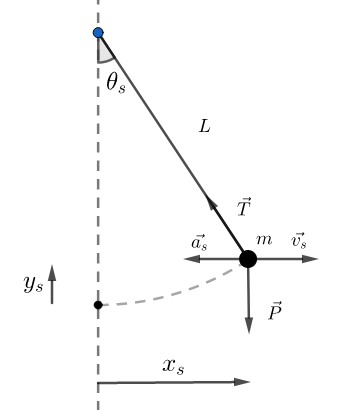)

Para $\theta$  pequeno podemos dizer que $a_s$ e $v_s$ são horizontais e portanto há equilíbrio na vertical.
$$  T_y = m g ~~ \rightarrow ~~ T = mg ~sec~ \theta_s $$

Calculando agora a aceleração no eixo horizontal e usando a aproximação $tg ~ \theta_s ~ \approx ~\theta_s \approx ~ \frac{x_s}{L}$:
$$ ma_s = - T_x ~~ \rightarrow ~~ m a_s = - mg ~ tg ~ \theta_s   $$
$$\rightarrow a_s + \frac{g}{L} ~x_s = 0$$

Resolvendo essa equação diferencial obtemos que:
$$ x_s(t) ~ = ~ A ~cos \left( \omega t ~+~ \phi_0  \right) ~~~ com ~~~ \omega ~ = ~\sqrt\frac{g}{L}  ~~ e ~~ A \ll L   $$

Para achar o $~y_s(t)$  podemos ver na geometria que $(L-y_s)^2 + x_s^2 ~ = L^2~$, então:
$$ y_s(t) ~ = ~ L ~-  ~\sqrt{L^2 -  (~A ~cos \left( \omega t ~+~ \phi_0  \right)~)^2}    $$

In [0]:
# params[0] = A; params[1] =  w (omega); params[2] = phi_0; params[3] = g; params[4] = L;
def proxXA(t, params):
    return params[0]*(math.cos((params[1]*t)+params[2]))

def proxYA(t, params):
    aux = params[0]*(math.cos((params[1]*t)+params[2]))
    return params[4] - math.sqrt(params[4]*params[4] - (aux*aux))

Aproveitando parte da solução analítica pode-se encontrar $x_s(t)$:

$$ \ddot x_s(t) ~ = ~ - \frac g L x_s(t) ~~~ \rightarrow ~~~ \dot x_s(t + \Delta t ) ~-~ \dot x_s(t) ~ = ~ - \frac g L x_s(t) ~\Delta t    $$

$$ \rightarrow ~~~ {v_s}_x(t + \Delta t) ~ = ~ {v_s}_x(t) ~ - ~ \frac g L x_s(t) ~\Delta t  $$

$$ {x_s}_x(t+\Delta t) ~ = ~ {x_s}_x(t) ~+~ {v_s}_x(t)~\Delta t   $$

Podemos também usar a mesma relação usada na solução analítica para encontrar $y_s(t)$:

$$ (L ~ - ~ y_s(t))^2 ~+ ~ x_s(t)^2 ~ = ~ L^2 $$
$$ y_s(t) ~ = ~ L ~-  ~\sqrt{L^2 ~ - ~ x_s(t)^2}$$

In [0]:
# params[0] = Vantes, params[1] = Xantes, params[2] = g, params[2] = L
def proxVE(Vantes, Xantes, params):
  vAntes = params[0]
  xAntes = params[1]
  g = params[2]
  L = params[3]

  return vAntes - (g/l) * xAntes * deltaT

def proxXE(deltaT, params):
  vAntes = params[0]
  xAntes = params[1]
  g = params[2]
  L = params[3]

  return xAntes + vAntes * deltaT

def proxYE(deltaT, params):
  vAntes = params[0]
  xAntes = params[1]
  g = params[2]
  L = params[3]

  return L - sqrt(L*L - xAntes * xAntes)

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>

[1.0, -0.6172728764571667, -0.2379483919805909, 0.9110310531896002, -0.8867611255077021, 0.18371612815546762, 0.6599551597515042, -0.9984609677405876, 0.5726905874233733, 0.29144823530304725, -0.9324967685111276]
[0.2679491924311228, 0.09763983536494969, 0.014205306998265943, 0.21954432233648458, 0.20733307435867676, 0.008455778985672735, 0.11202246117244097, 0.2670615429570127, 0.08374701798622852, 0.021349468415723605, 0.2306922888552414]
Eixo X:




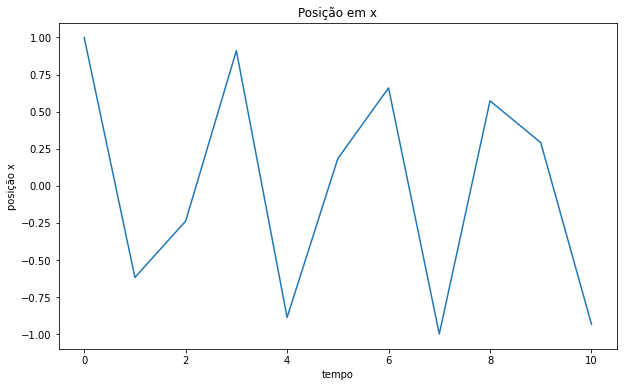

Eixo Y:




"\nfig = plt.figure()\nax = plt.axes(xlim=(params[2], proxXA(tf, params)), ylim=(proxYA(tf, params), params[5]))\nline, = ax.plot([], [], 'D', lw=2)\nplt.title('Animação')\nplt.ylabel('posição y')\nplt.xlabel('posição x')\n#plt.xticks([])\nplt.close()\n\ndef init():\n    line.set_data([], [])\n    return line,\n\nframerate = 20\n\ndef animate(i):\n    ti = i/framerate\n    x = proxXA(ti, params)\n    y = proxYA(ti, params)\n    line.set_data(x, y)\n    return line,\n\nanim = animation.FuncAnimation(fig, animate, init_func=init,\n                               frames=tf*framerate, interval=1000/framerate, blit=True)\nrc('animation', html='jshtml')\n\nanim\n"

In [0]:
# params[0] = A; params[1] =  w (omega); params[2] = phi_0; params[3] = g; params[4] = L;
# davi tlgd que w = sqrt(g/l) neh?
A = 1
g = 10
l = 2
t = 0
tf = 10
params = [A, math.sqrt(g/l), 0, g, l]
v = 10
dt = 1

valoresXA = []
valoresXE = []
valoresYA = []
valoresYE = []
valoresV = []

while t <= tf:
    #valoresVYA.append(proxVYA(t, params))
    valoresYA.append(proxYA(t, params))
    #valoresVYE.append(vy)
    #valoresYE.append(y)
    #vy = proxVYE(vy, t, dt, params)
    #v = proxVE(dt, params)
    #y = proxYE(dt, params)

    #valoresVXA.append(proxVXA(t, params))
    valoresXA.append(proxXA(t, params))
    #valoresVXE.append(vx)
    #valoresXE.append(x)
    #vx = proxVXE(vx, t, dt, params)
    #x = proxXE(x, vx, dt)
    t += dt

print(valoresXA)
print(valoresYA)


print("Eixo X:\n\n")

#teste

'''
# grafico de posição
plt.plot(valoresXA, valoresYA, label='Analítico')
plt.plot(valoresXE, valoresYE, label='Euler', linestyle=':', marker='D')
plt.title('Posição em x')
plt.xlabel('tempo')
plt.ylabel('posição x')
plt.show()
'''

# grafico de posição
plt.plot(valoresXA, label='Analítico')
#plt.plot(valoresXE, label='Euler', linestyle=':', marker='D')
plt.title('Posição em x')
plt.xlabel('tempo')
plt.ylabel('posição x')
plt.show()



print("Eixo Y:\n\n")
'''
plt.plot(valoresYA, label='Analítico')
plt.plot(valoresYE, label='Euler', linestyle=':', marker='D')
plt.title('Posição Y')
plt.xlabel('tempo')
plt.ylabel('posição em y')
plt.show()
'''

#animação
'''
fig = plt.figure()
ax = plt.axes(xlim=(params[2], proxXA(tf, params)), ylim=(proxYA(tf, params), params[5]))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.ylabel('posição y')
plt.xlabel('posição x')
#plt.xticks([])
plt.close()

def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    x = proxXA(ti, params)
    y = proxYA(ti, params)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim
'''



---

---

<h2>Bloco em rampa</h2>



<h4>Solução analítica</h4>

Vamos analisar esse movimento como composição de dois moviemtos uniformemente variados, um no eixo y e outro no eixo x. Também consideramos uma velocidade inicial v0 no sentido da rampa.

Eixo x:

\begin{align*}
    \ddot{x}(t) &= g \sin{\theta} \\
    \int \ddot{x}(t) dt &= \int g \sin{\theta} dt \\
    \dot{x}(t) &= g \sin{\theta}t + v_0\cos{\theta} \\
    \int \dot{x}(t) dt &= \int g \sin{\theta}t + v_0\cos{\theta} dt \\
    x(t) &= \frac{g \sin{\theta}}{2}t^2 + v_0\cos{\theta}t + x_0,
\end{align*}

Eixo y:

\begin{align*}
    \ddot{y}(t) &= -g \cos{\theta} \\
    \int \ddot{y}(t) dt &= \int -g \cos{\theta} dt \\
    \dot{y}(t) &= -g \cos{\theta}t + v_0\sin{\theta} \\
    \int \dot{y}(t) dt &= \int -g \cos{\theta}t + v_0\sin{\theta} dt \\
    y(t) &= -\frac{g \cos{\theta}}{2}t^2 + v_0\sin{\theta}t + y_0,
\end{align*}

obtemos a equação analítica da posição em relação ao tempo do movimento queda livre.

In [0]:
# params[0] = gsin(theta); params[1] =  v0cos(theta); params[2] = x0
def proxXA(t, params):
    return params[0] * t * t / 2 + params[1] * t + params[2]

def proxVXA(t, params):
    return params[0] * t + params[1]

# params[3] = gcos(theta); params[4] =  -v0sin(theta); params[5] = y0
def proxYA(t, params):
    return -params[3] * t * t / 2 + params[4] * t + params[5]

def proxVYA(t, params):
    return -params[3] * t + params[4]

Eixo y:

Na solução por Euler, sabendo que $\ddot{y}(t) = a$, vemos que

\begin{align*}
    \ddot{y}(t) &= \frac{\dot{y}(t + \Delta t) - \dot{y}(t)}{\Delta t} \\
    \ddot{y}(t)\Delta t &= \dot{y}(t + \Delta t) - \dot{y}(t) \\
    \dot{y}(t + \Delta t) &= \dot{y}(t) + \ddot{y}(t)\Delta t \\
    v_y(t + \Delta t) &= v_y(t) - g\cos(\theta)\Delta t
\end{align*}

e que

\begin{align*}
    \dot{y}(t) &= \frac{y(t + \Delta t) - y(t)}{\Delta t} \\
    \dot{y}(t)\Delta t &= y(t + \Delta t) - y(t) \\
    y(t + \Delta t) &= y(t) + \dot{y}(t)\Delta t \\
    y(t + \Delta t) &= y(t) + v(t)\Delta t.
\end{align*}

Eixo x:

Na solução de Euler, aproximamos a integral pela série de Taylor. Sabendo que $\ddot{x}(t) = a$, vemos que

\begin{align*}
    \ddot{x}(t) &= \frac{\dot{x}(t + \Delta t) - \dot{x}(t)}{\Delta t} \\
    \ddot{x}(t)\Delta t &= \dot{x}(t + \Delta t) - \dot{x}(t) \\
    \dot{x}(t + \Delta t) &= \dot{x}(t) + \ddot{x}(t)\Delta t \\
    v_x(t + \Delta t) &= v_x(t) + g \sin{\theta}\Delta t
\end{align*}

e que

\begin{align*}
    \dot{x}(t) &= \frac{x(t + \Delta t) - x(t)}{\Delta t} \\
    \dot{x}(t)\Delta t &= x(t + \Delta t) - x(t) \\
    x(t + \Delta t) &= x(t) + \dot{x}(t)\Delta t \\
    x(t + \Delta t) &= x(t) + v(t)\Delta t. \\
\end{align*}


In [0]:
def proxVXE(v, t, dt, params):
    return v + params[0] * dt

def proxXE(x, v, dt):
    return x + v * dt

def proxVYE(v, t, dt, params):
    return v - params[3] * dt

def proxYE(y, v, dt):
    return y + v * dt

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Explicação aqui

<h4>Animação</h4>

Gráfico de X com Y:


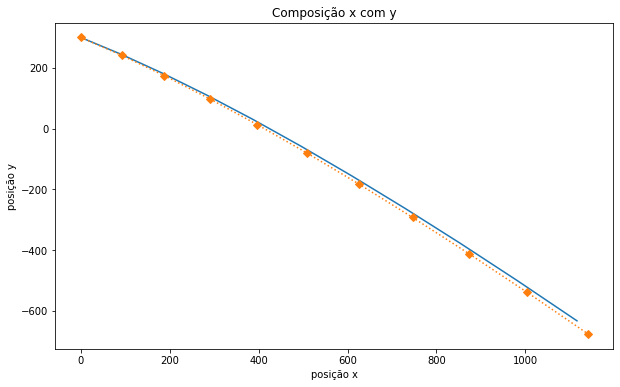

Eixo X:




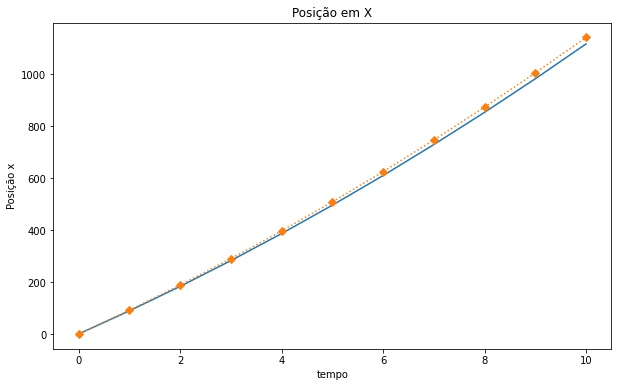

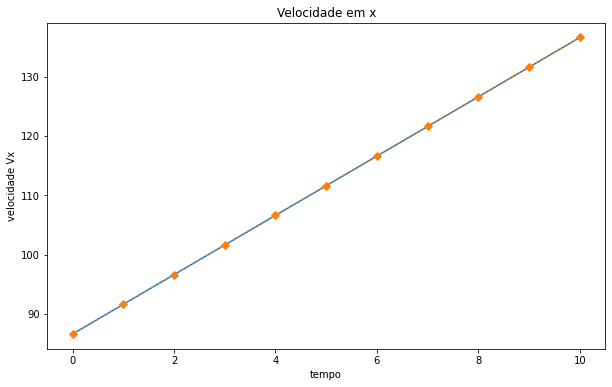

Eixo y: 


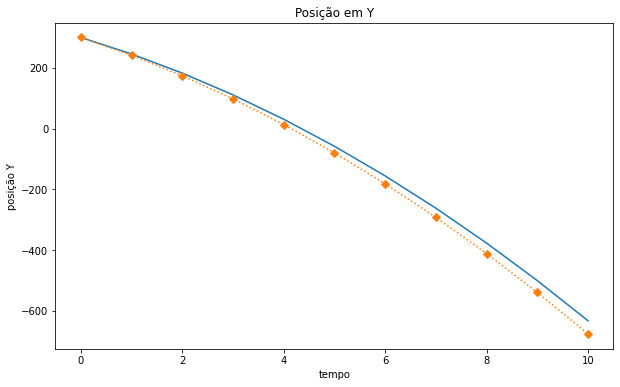

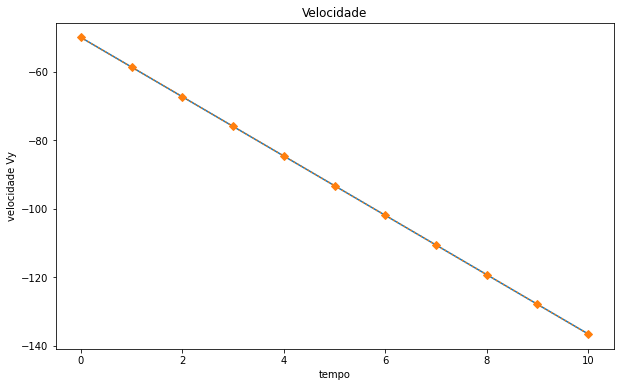

In [32]:
# params[0] = gsin(theta); params[1] =  v0cos(theta); params[2] = x0
# params[3] = gcos(theta); params[4] =  v0sin(theta); params[5] = y0

g = 10
v0 = 100
theta = math.pi/6
t = 0
tf = 10
params = [g*math.sin(theta), v0*math.cos(theta), 0, g*math.cos(theta), -v0*math.sin(theta), 300]
vx = params[1]
x = params[2]
vy = params[4]
y = params[5]
dt = 1

valoresXA = []
valoresVXA = []
valoresXE = []
valoresVXE = []
valoresYA = []
valoresVYA = []
valoresYE = []
valoresVYE = []

while t <= tf:
    valoresVYA.append(proxVYA(t, params))
    valoresYA.append(proxYA(t, params))
    valoresVYE.append(vy)
    valoresYE.append(y)
    vy = proxVYE(vy, t, dt, params)
    y = proxYE(y, vy, dt)

    valoresVXA.append(proxVXA(t, params))
    valoresXA.append(proxXA(t, params))
    valoresVXE.append(vx)
    valoresXE.append(x)
    vx = proxVXE(vx, t, dt, params)
    x = proxXE(x, vx, dt)
    t += dt

#print(valoresXA)
#print(valoresYA)

print("Gráfico de X com Y:")
# grafico de posição
plt.plot(valoresXA, valoresYA, label='Analítico')
plt.plot(valoresXE, valoresYE, label='Euler', linestyle=':', marker='D')
plt.title('Composição x com y')
plt.xlabel('posição x')
plt.ylabel('posição y')
plt.show()

print("Eixo X:\n\n")

#teste



# grafico de posição
plt.plot(valoresXA, label='Analítico')
plt.plot(valoresXE, label='Euler', linestyle=':', marker='D')
plt.title('Posição em X')
plt.xlabel('tempo')
plt.ylabel('Posição x')
plt.show()

# grafico de velocidade
plt.plot(valoresVXA, label='Analítico')
plt.plot(valoresVXE, label='Euler', linestyle=':', marker='D')
plt.title('Velocidade em x')
plt.xlabel('tempo')
plt.ylabel('velocidade Vx')
plt.show()

print("Eixo y: ")

plt.plot(valoresYA, label='Analítico')
plt.plot(valoresYE, label='Euler', linestyle=':', marker='D')
plt.title('Posição em Y')
plt.xlabel('tempo')
plt.ylabel('posição Y')
plt.show()


plt.plot(valoresVYA, label='Analítico')
plt.plot(valoresVYE, label='Euler', linestyle=':', marker='D')
plt.title('Velocidade')
plt.xlabel('tempo')
plt.ylabel('velocidade Vy')
plt.show()



#animação

fig = plt.figure()
ax = plt.axes(xlim=(params[2], proxXA(tf, params)), ylim=(proxYA(tf, params), params[5]))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.ylabel('posição y')
plt.xlabel('posição x')
#plt.xticks([])
plt.close()

def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    x = proxXA(ti, params)
    y = proxYA(ti, params)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim



---

---

<h2>Movimento Circular</h2>



<h4>Solução analítica sem atrito</h4>

No movimento circular uniforme, a velocidade com que um objeto se move é relacionado a sua velocidade angular, chamada de $\omega$.
\begin{align*}
\dot{\theta}(t) &=\omega \\
\int \dot{\theta}(t)\; dt &=\int \omega \; dt\\
\theta(t) &= \omega t + \theta_0(t)
\end{align*}

Assim é obtida a função analítica de posição em relação ao tempo no movimento circular uniforme.

Porém ainda é preciso descobrir os pontos x e y de $\theta$. Chamando o ponto $\theta_0$ de O e $\theta$ de P, tem-se a imagem
![alt text](https://cdn.discordapp.com/attachments/349713012891844610/715829231061434388/image_2020-05-29_01-25-04.png).

Como PĈO é $\omega t$, chamando o angulo entre o eixo das abscissas e o segmento CO de $\alpha$, o raio do circulo de R e separando B em $O_x$ e $O_y$ e C em $P_x$ e $P_y$, tem-se que:
\begin{align*}
 P_x &= R * \cos{(\alpha + \omega t)} \\ e \\
 P_y &= R * \sin{(\alpha + \omega t)}
 \end{align*}
 
Como $O_x = R * \cos{\alpha}$ e $O_y = R * \sin{\alpha}$, a fórmula final se dá por
\begin{align*}
P_x &=  R * \left(\frac{O_x}{R} * \cos{(\omega t)} - \frac{O_y}{R} * \sin{(\omega t)}\right)\\
P_y &= R * \left(\frac{O_y}{R} * \cos{(\omega t)} + \frac{O_x}{R} * \sin{(\omega t)} \right)
\end{align*}

In [0]:
#param[0]= Ox, param[1]= Oy
def MCUproxPXA(t, r, Om, param):
  return r * (param[0]/r*math.cos(Om*t) - param[1]/r*math.sin(Om*t))

def MCUproxPYA(t, r, Om, param):
  return r * (param[1]/r*math.cos(Om*t) + param[0]/r*math.sin(Om*t))

<h4>Solução de Euler sem atrito</h4>

Na solução de Euler, aproximamos a integral pela serie de Taylor. Sabendo que $\dot{\theta}(t) = \omega$, pode-se ver que
\begin{align*}
\dot{\theta}(t)&=  \frac{\theta(t + \Delta t) - \theta(t)}{\Delta t} \\
\dot{\theta}(t) \; \Delta t &=  \theta(t + \Delta t) - \theta(t) \\
\theta(t + \Delta t) &= \theta(t) + \dot{\theta}(t) \; \Delta t \\
\theta(t + \Delta t) &= \theta(t) + \omega \; \Delta t \\
\end{align*}

Como $\theta$ é um ponto com eixo x e y, ainda é preciso desmembrar essa equação para achar os valores de $\theta _x(t+\Delta t)$ e $\theta _y(t+\Delta t)$. 
Da mesma forma que para a solução analítica, tem-se que 
\begin{align*}
\theta _x(t + \Delta t) &= R * \cos{(\beta + \omega * \Delta t)} \\ e \\ \theta _y(t + \Delta t) &= R * \sin{(\beta + \omega * \Delta t)}
\end{align*}

Onde $\beta$ é o angulo relacionado com $\theta (t)$, de forma que $\cos{\beta} * R = \theta _x$ e $\sin{\beta} * R = \theta _y$.

Com isto, chega-se na fórmula
\begin{align*}
\theta _x (t + \Delta t) &= R * \left(\frac{\theta _x(t)}{R} * \cos{(\omega * \Delta t)} - \frac{\theta _y(t)}{R} * \sin{\omega * \Delta t} \right) \\
\theta _y (t + \Delta t) &= R * \left(\frac{\theta _y(t)}{R} * \cos{(\omega * \Delta t)}+ \frac{\theta _x(t)}{R} * \sin{\omega * \Delta t}\right)
\end{align*}



In [0]:
# x é o valor atual de x em theta(t), y é o valor atual de y em theta(t), Om = omega
def MCUproxPXE(x , y, r, Om, dt):
    return r * (x/r * math.cos(Om*dt) - y/r * math.sin(Om*dt))

def MCUproxPYE(x , y, r, Om, dt):
    return r * (y/r * math.cos(Om*dt) + x/r * math.sin(Om*dt))

<h4>Comparação das duas implementações e diferenças encontradas</h4>

Na solução analítica foi calculada a posição P de um ponto tendo como base apenas a posição inicial O, independentemente de onde P passou. Ja na solução de Euler, para achar a posição P é preciso saber a posição de P no momento anterior. 

Entretanto, as duas soluções chegam no resultado, pois para calcular o ponto P no n-ésimo segundo, considerando $\alpha$ como o angulo da posição inicial O, tem-se as fórmulas:

Usando a solução analítica:
\begin{align*}
P_x=\cos{(\alpha + \omega * (n*\Delta t))}\\
P_y=\sin{(\alpha + \omega * (n*\Delta t))}\\
\end{align*},

Usando a solução de Euler:
\begin{align*}
P_x=\cos{((\alpha+(n-1)*\Delta t) + \omega * \Delta t)}\\
P_y=\sin{((\alpha+(n-1)*\Delta t)+ \omega * \Delta t)}\\
\end{align*}.

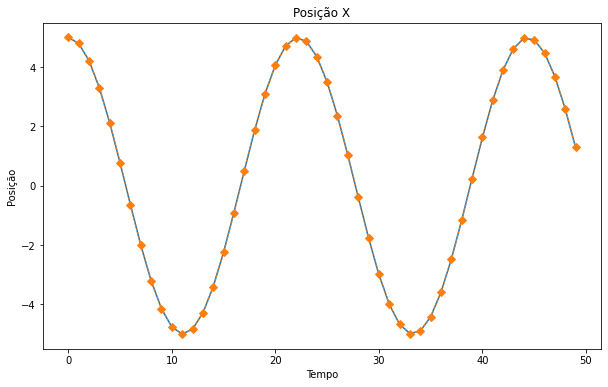

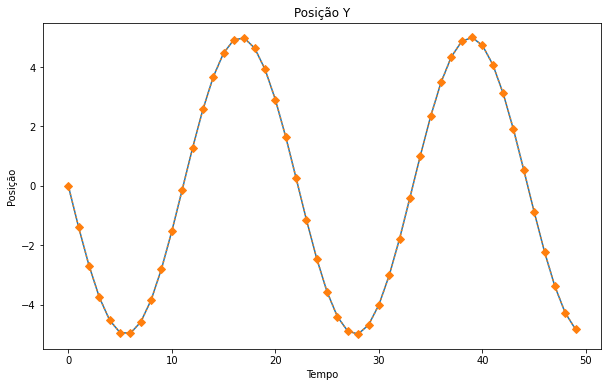

In [0]:
t = 0 #tempo atual
tf = 50 #tempo final
r = 5 # raio do circulo
Om = 6 # velocidade angular
params = [5, 0] #Ox, Oy
x = params[0] #posição atual em relação ao eixo x; usado para Euler
y = params[1] #posição atual em relação ao eixo y. usado para Euler
dt = 1; #intervalo de tempo entre cada simulação

MCUvaloresPXA=[]
MCUvaloresPYA=[]
MCUvaloresPXE=[]
MCUvaloresPYE=[]

while t < tf:
    MCUvaloresPXA.append(MCUproxPXA(t, r, Om, params));
    MCUvaloresPYA.append(MCUproxPYA(t, r, Om, params));
    MCUvaloresPXE.append(x)
    MCUvaloresPYE.append(y)
    x0 = MCUproxPXE(x, y, r, Om, dt)
    y0 = MCUproxPYE(x, y, r, Om, dt)
    x=x0
    y=y0
    t += dt

plt.rcParams['figure.figsize']={10, 6}
plt.plot(MCUvaloresPXA, label='Analítico')
plt.plot(MCUvaloresPXE, label='Euler', linestyle=':', marker='D')
plt.title('Posição X')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.show()

plt.plot(MCUvaloresPYA, label='Analítico')
plt.plot(MCUvaloresPYE, label='Euler', linestyle=':', marker='D')
plt.title('Posição Y')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.show()

#animação

fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], 'D', lw=2)
plt.title('Animação')
plt.ylabel('posição y')
plt.xlabel('posição x')
#plt.xticks([])
plt.close()

def init():
    line.set_data([], [])
    return line,

framerate = 20

def animate(i):
    ti = i/framerate
    x = MCUproxPXA(ti, r, Om/framerate, params)
    y = MCUproxPYA(ti, r, Om/framerate, params)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tf*framerate, interval=1000/framerate, blit=True)
rc('animation', html='jshtml')

anim

<h4>Animação</h4>